# Data Processing and Analysis

In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from data_processing import * 
from plots import *
from normalization import encoder, scaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
# Load Data
credit, ip, fraud = load_data()

2024-10-20 22:24:03,384 - INFO - Loading data from file...
2024-10-20 22:24:05,551 - INFO - Data loaded 


## Data Summary

In [3]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
fraud.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0
151111,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0


In [6]:
ip.describe(include='all')

,lower_bound_ip_address,upper_bound_ip_address,country
count,1.388460e+05,1.388460e+05,138846
unique,NaN,NaN,235
top,NaN,NaN,United States
freq,NaN,NaN,46868
mean,2.724532e+09,2.724557e+09,NaN
std,8.975215e+08,8.974979e+08,NaN
min,1.677722e+07,1.677747e+07,NaN
25%,1.919930e+09,1.920008e+09,NaN
50%,3.230887e+09,3.230888e+09,NaN
75%,3.350465e+09,3.350466e+09,NaN


In [7]:
fraud.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-02-24 22:55:49,2015-06-08 09:42:04,NaN,CQTUVBYIWWWBC,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


## Duplicates 

In [8]:
credit.duplicated().sum()

1081

In [9]:
ip.duplicated().sum()

0

In [10]:
fraud.duplicated().sum()

0

- Remove duplicates from the credit data

In [11]:
credit.drop_duplicates(inplace=True)

## Missing Values and Data types

In [12]:
data_overview(credit)

2024-10-20 22:24:08,021 - INFO - Loading Data Overivew


The shape of our Data is (283726, 31)

Data Overview:


,Data Types,Number of missing values,Unique values
Class,int64,0,2
Amount,float64,0,32767
Time,float64,0,124592
V3,float64,0,275663
V28,float64,0,275663
V27,float64,0,275663
V26,float64,0,275663
V25,float64,0,275663
V24,float64,0,275663
V23,float64,0,275663


In [13]:
data_overview(ip)

2024-10-20 22:24:08,477 - INFO - Loading Data Overivew


The shape of our Data is (138846, 3)

Data Overview:


,Data Types,Number of missing values,Unique values
country,object,0,235
lower_bound_ip_address,float64,0,138846
upper_bound_ip_address,int64,0,138846


In [14]:
data_overview(fraud)

2024-10-20 22:24:08,518 - INFO - Loading Data Overivew


The shape of our Data is (151112, 11)

Data Overview:


,Data Types,Number of missing values,Unique values
sex,object,0,2
class,int64,0,2
source,object,0,3
browser,object,0,5
age,int64,0,58
purchase_value,int64,0,122
device_id,object,0,137956
ip_address,float64,0,143512
purchase_time,object,0,150679
user_id,int64,0,151112


In [15]:
fraud.purchase_time = pd.to_datetime(fraud.purchase_time)

fraud.signup_time = pd.to_datetime(fraud.signup_time)


Insights
- All datasets have no missing value

## EDA

### credit

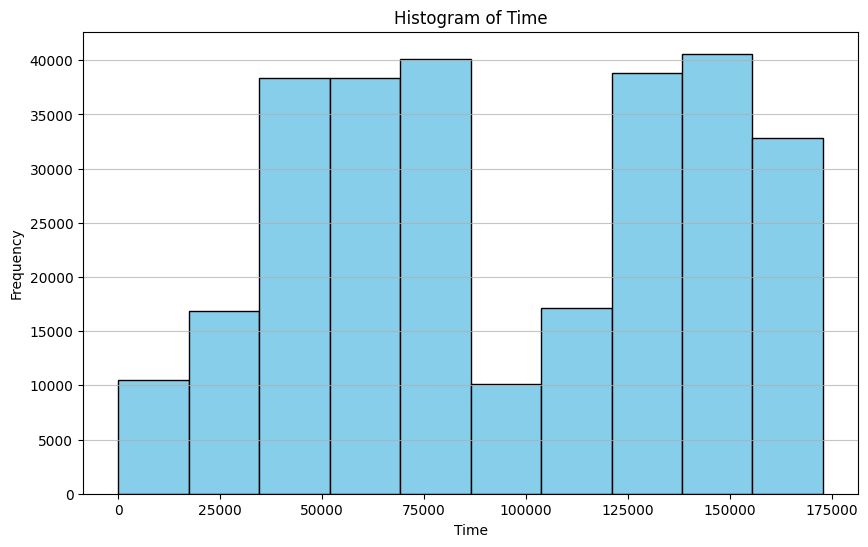

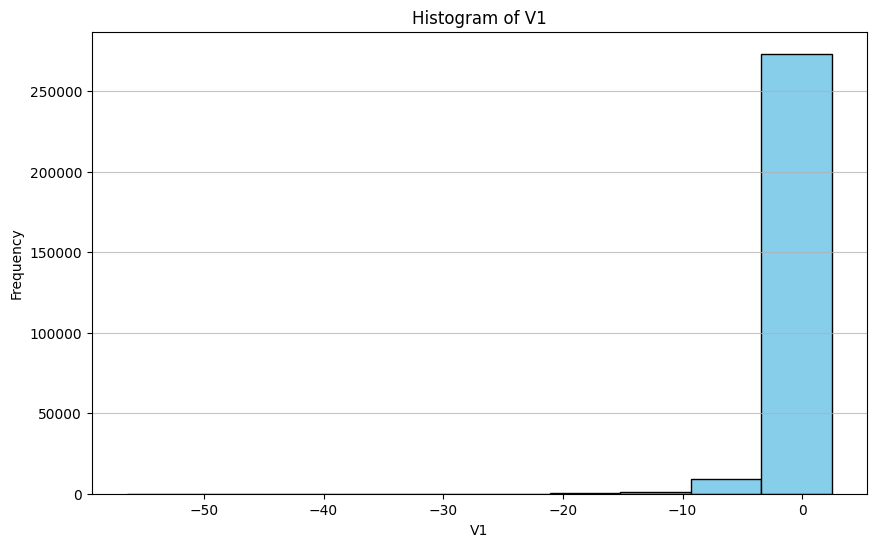

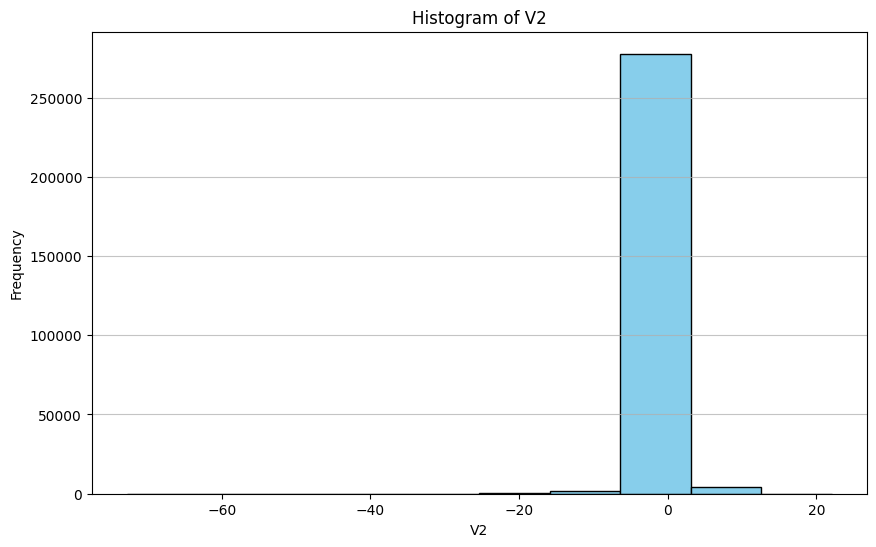

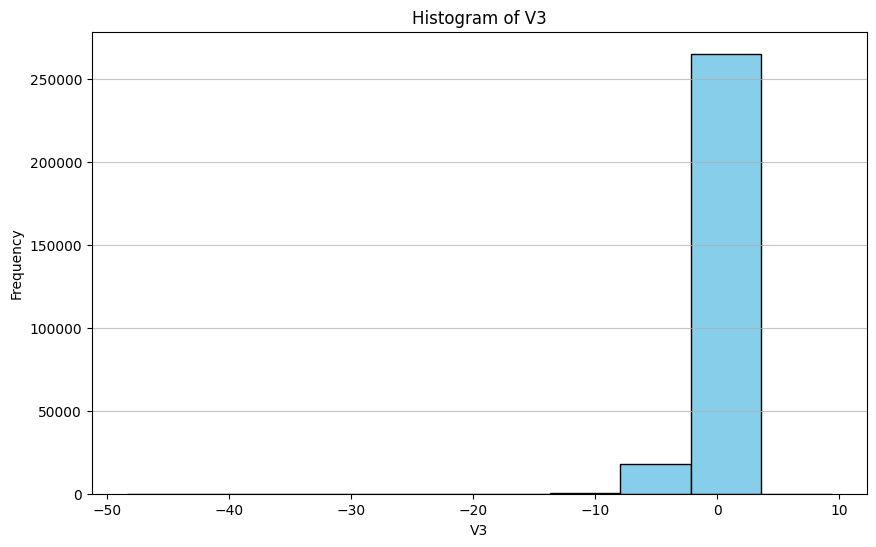

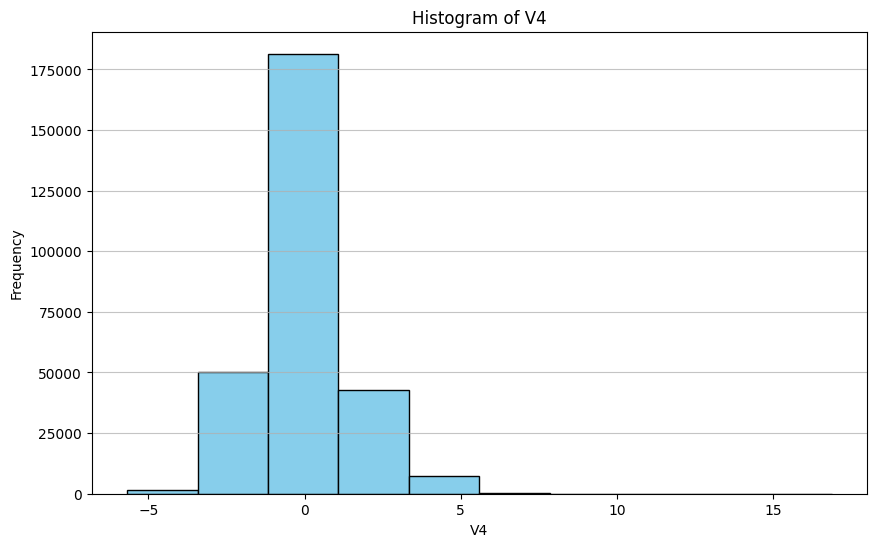

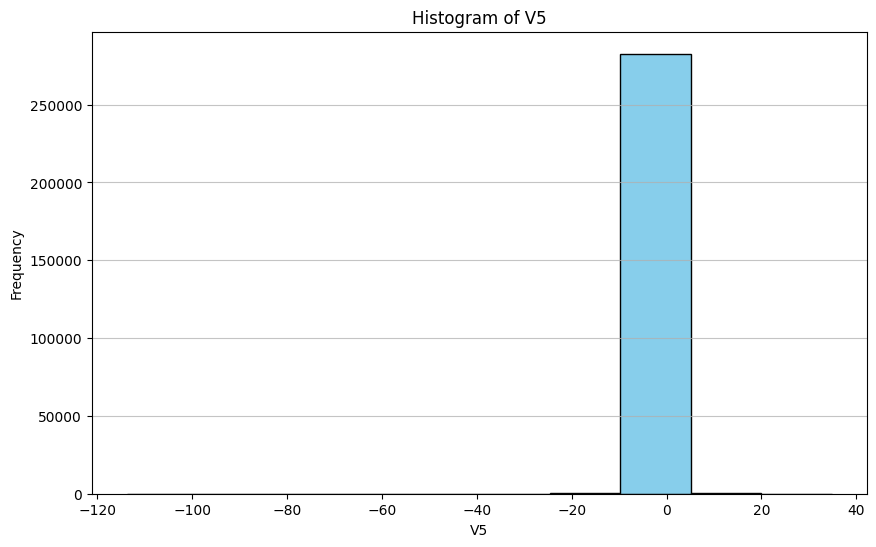

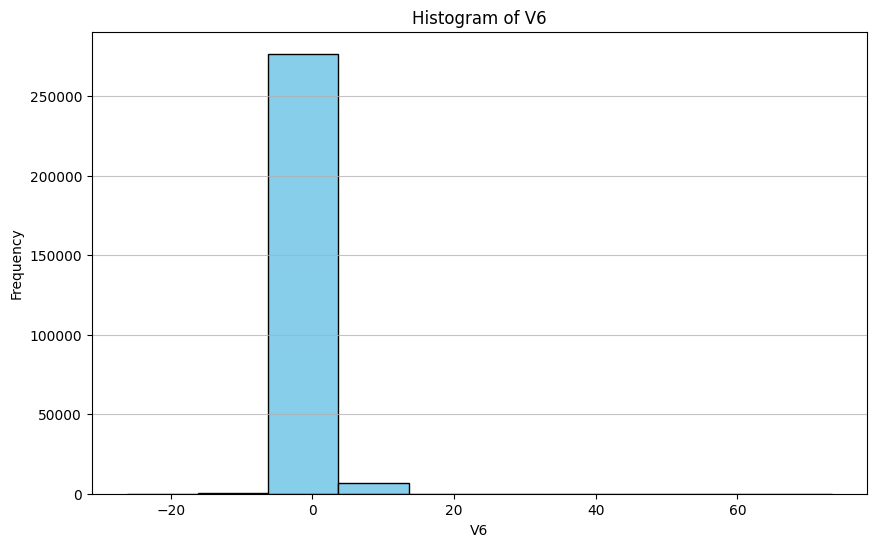

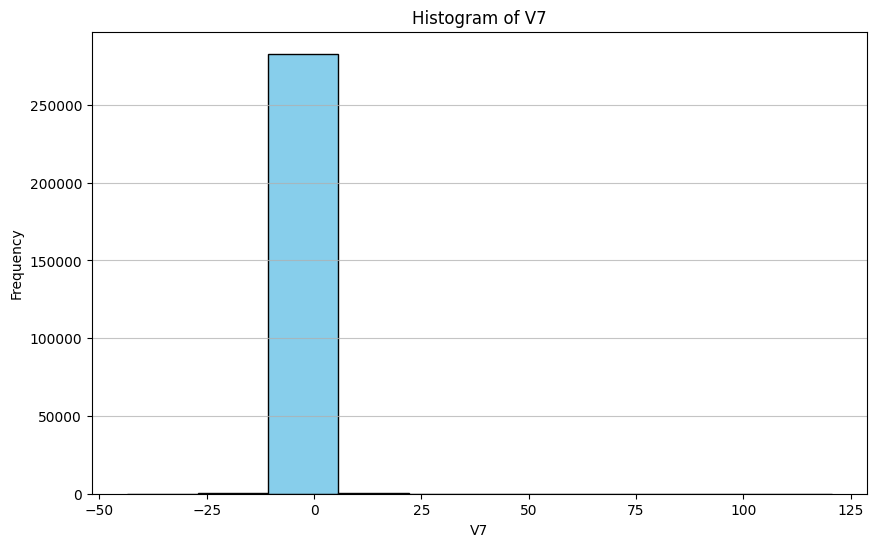

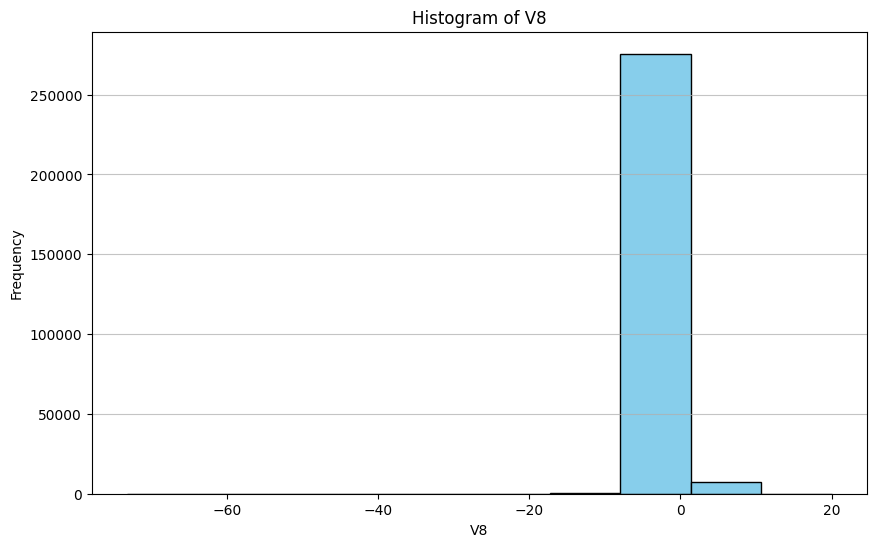

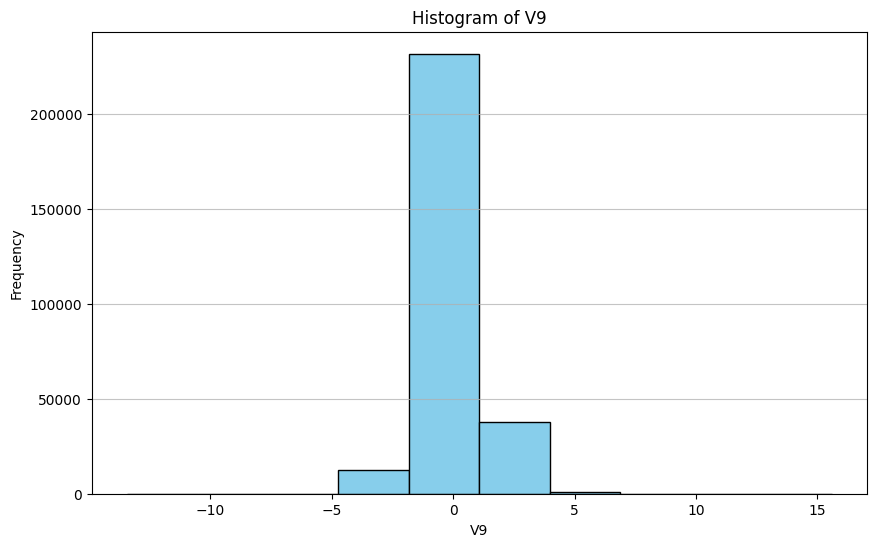

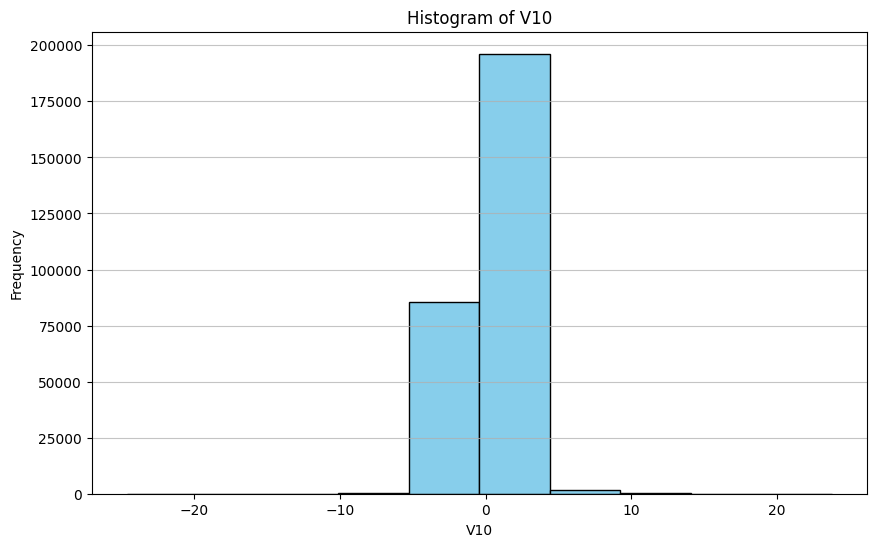

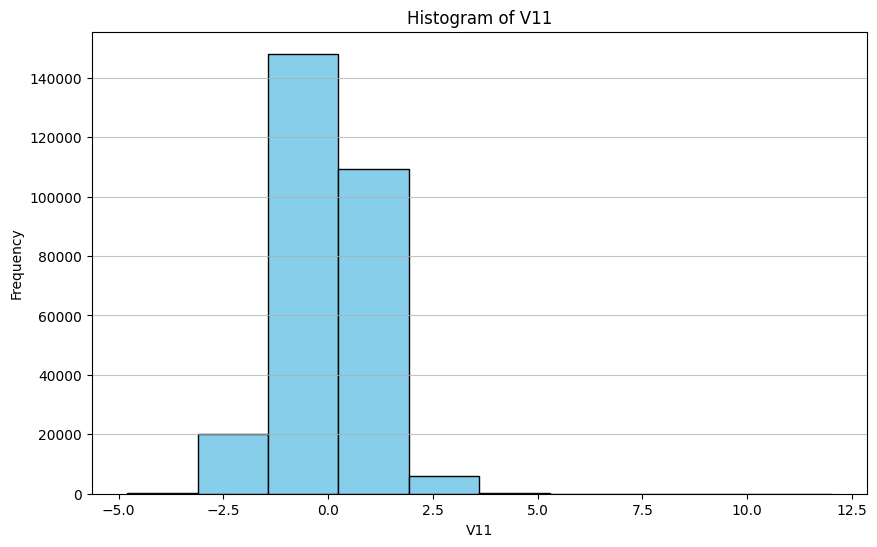

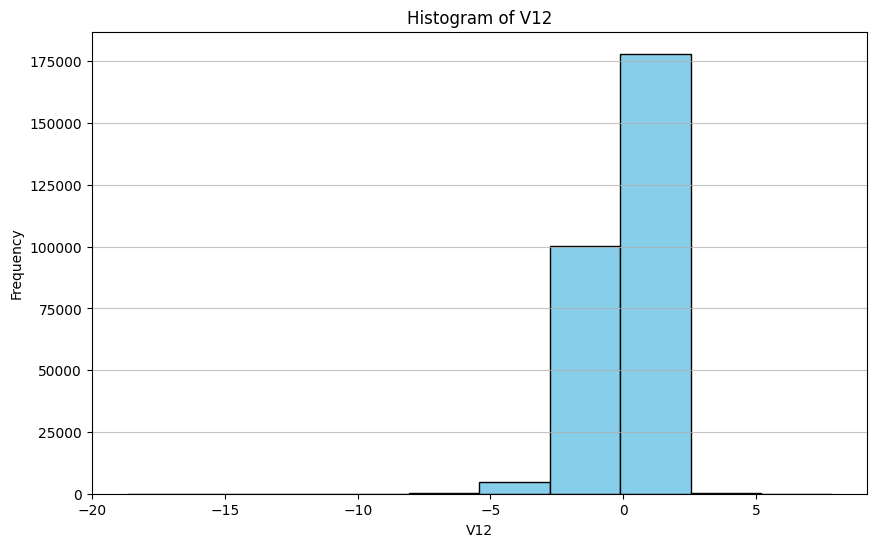

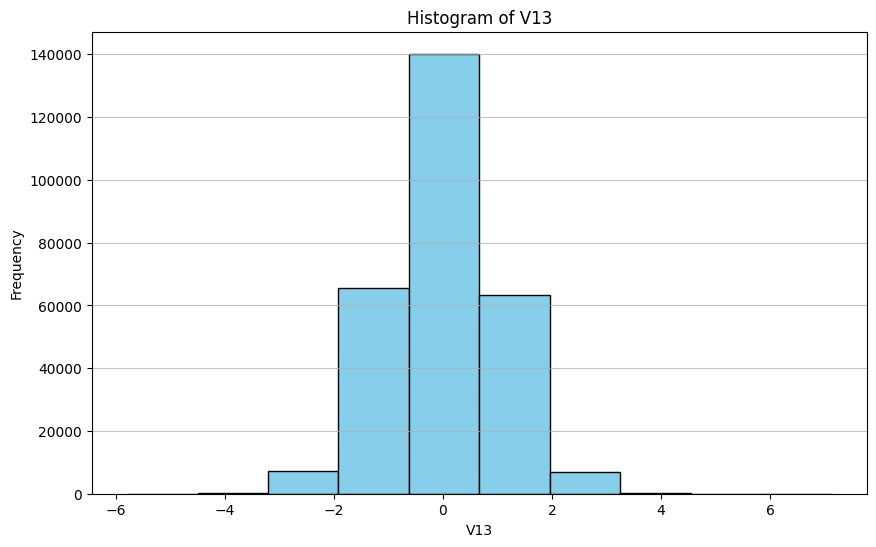

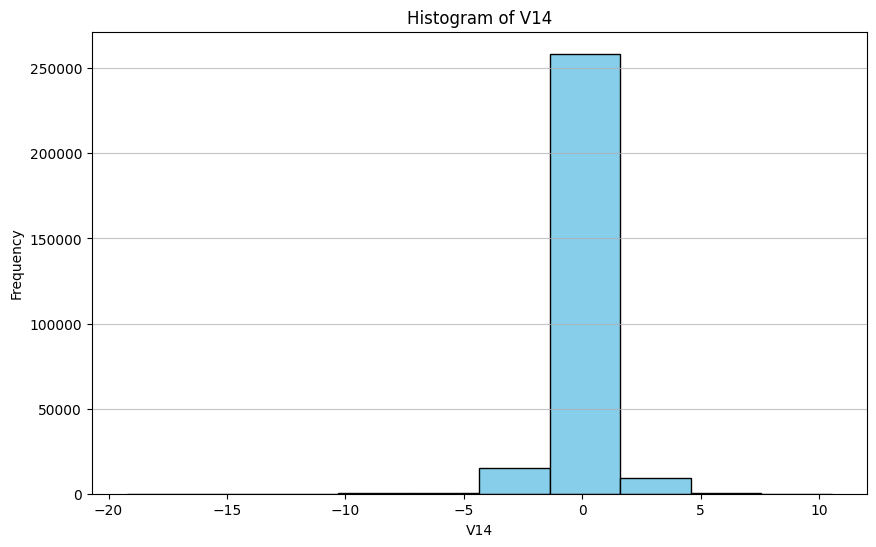

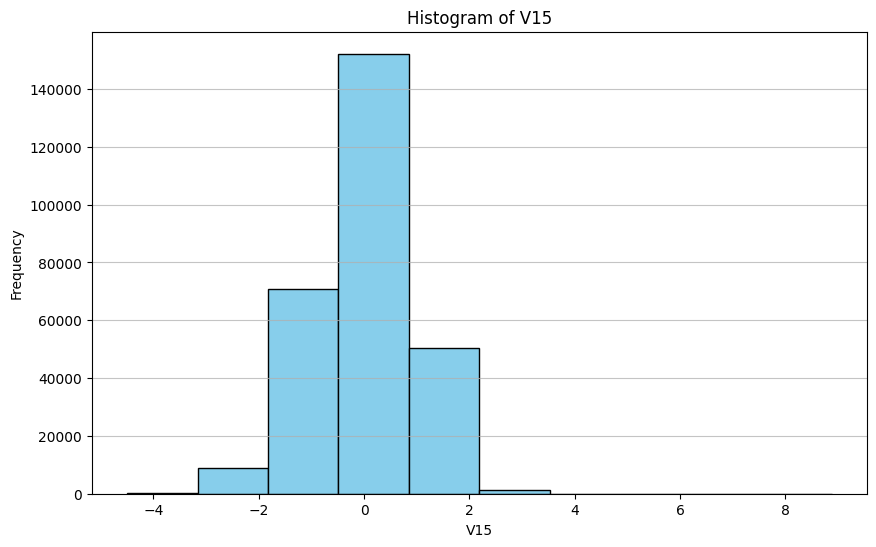

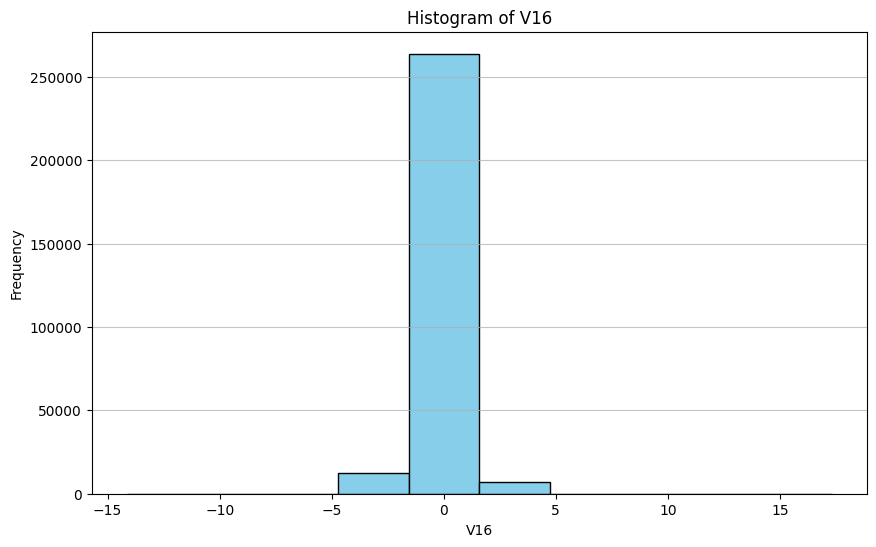

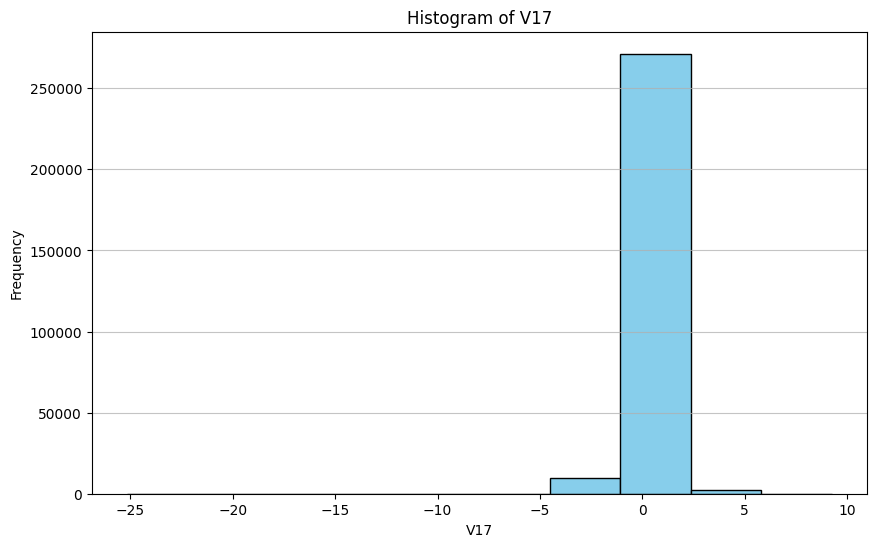

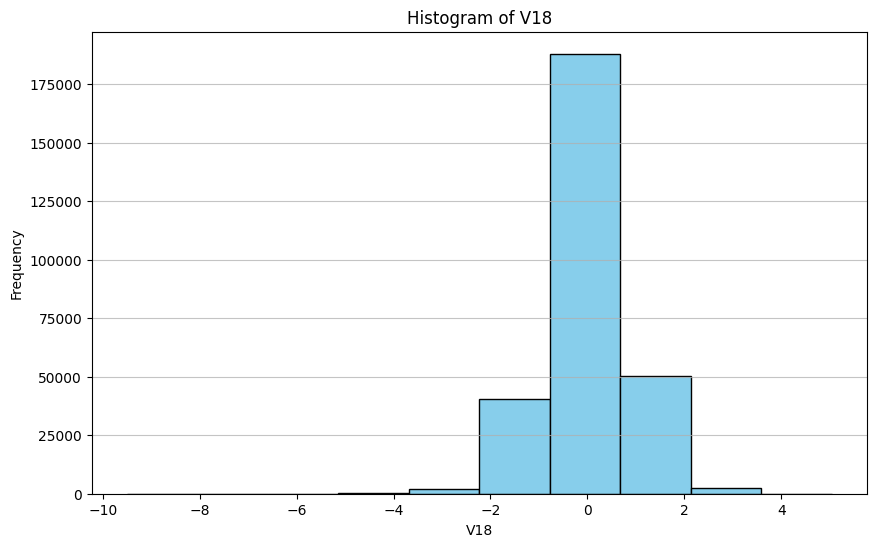

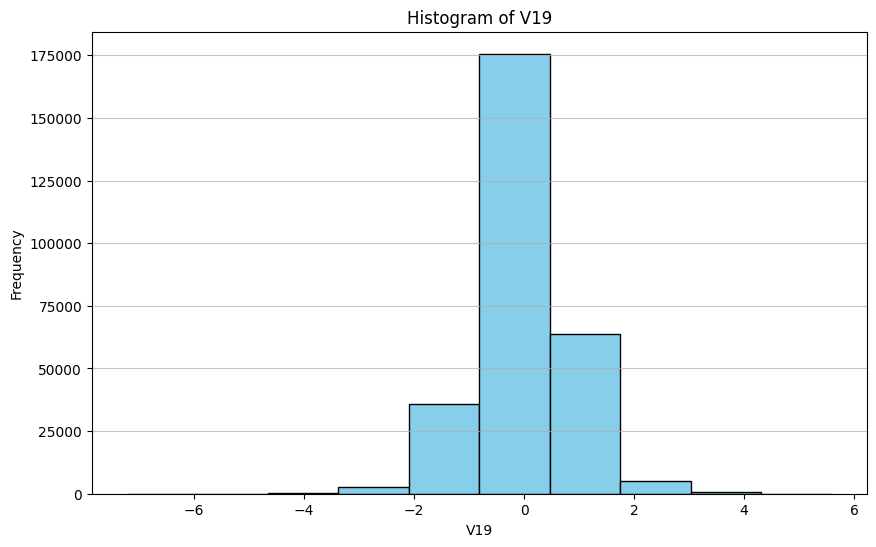

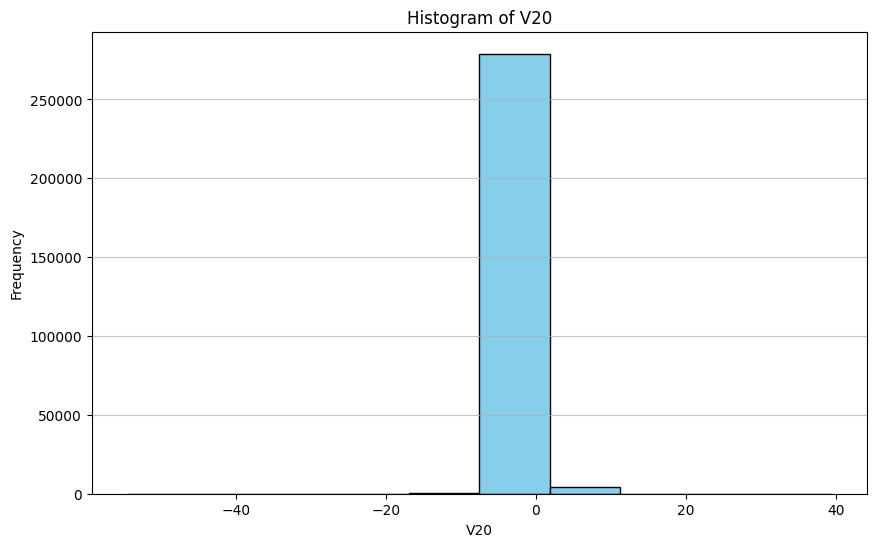

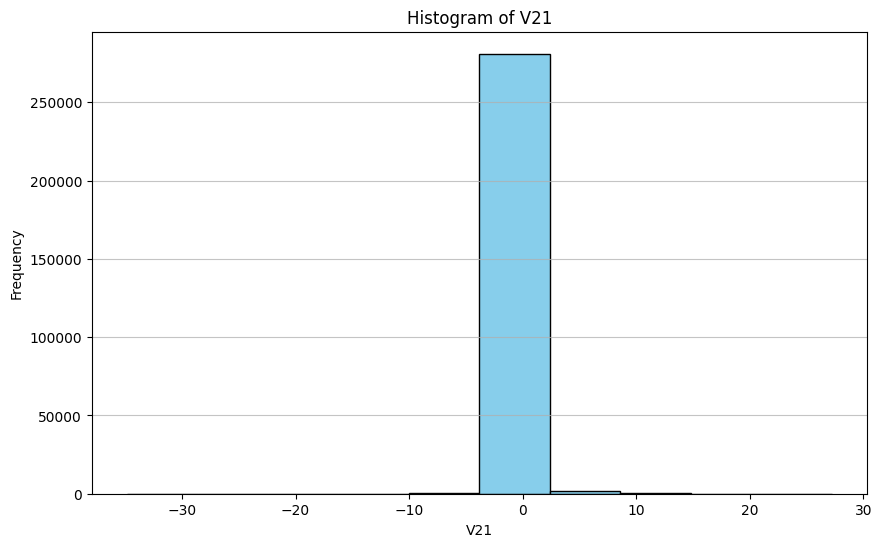

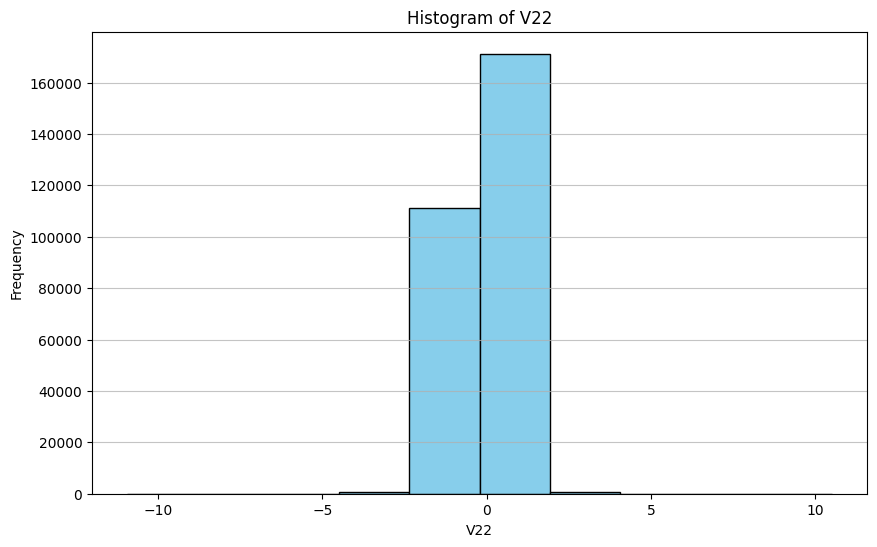

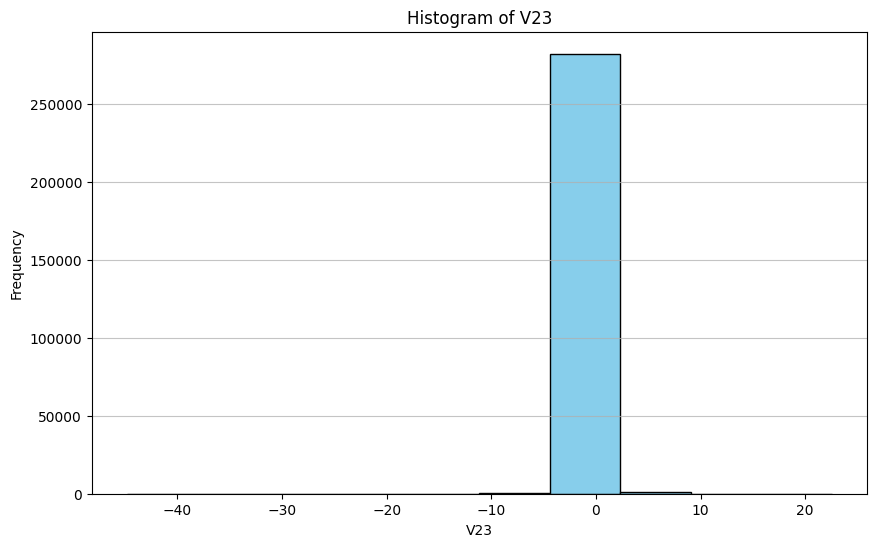

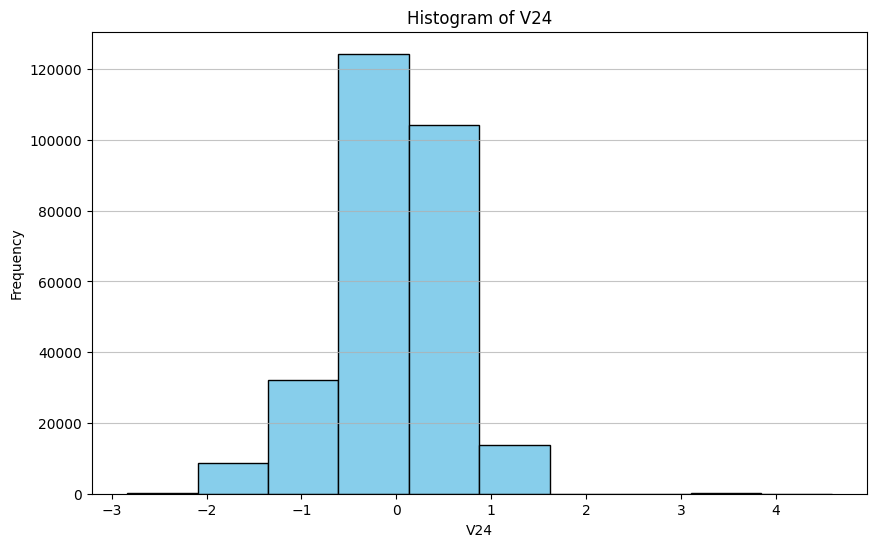

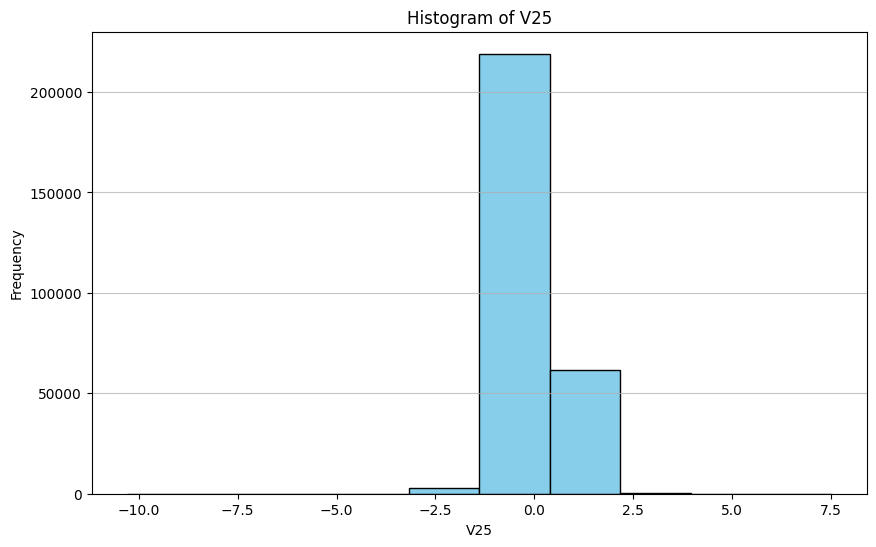

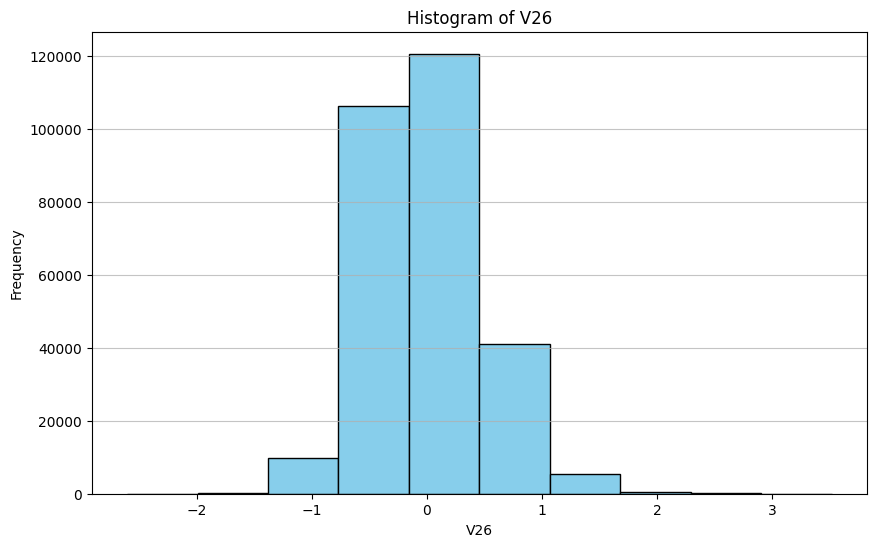

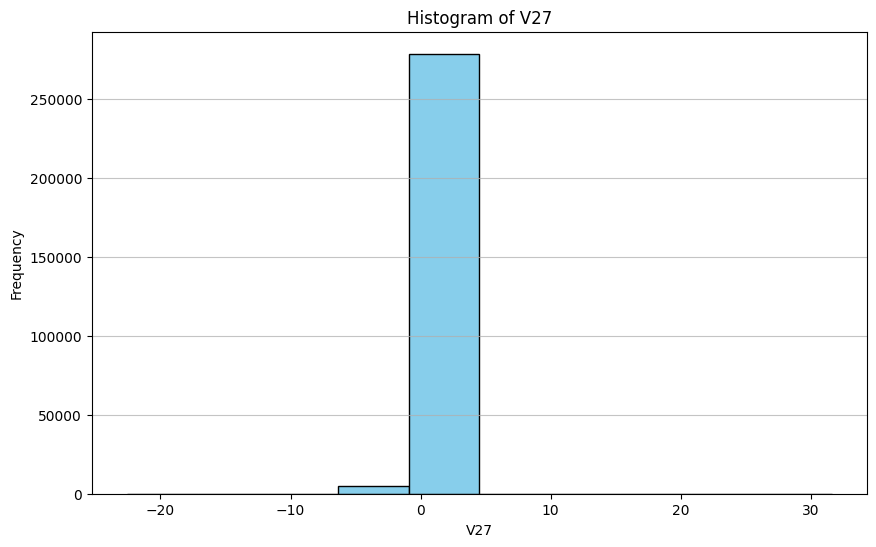

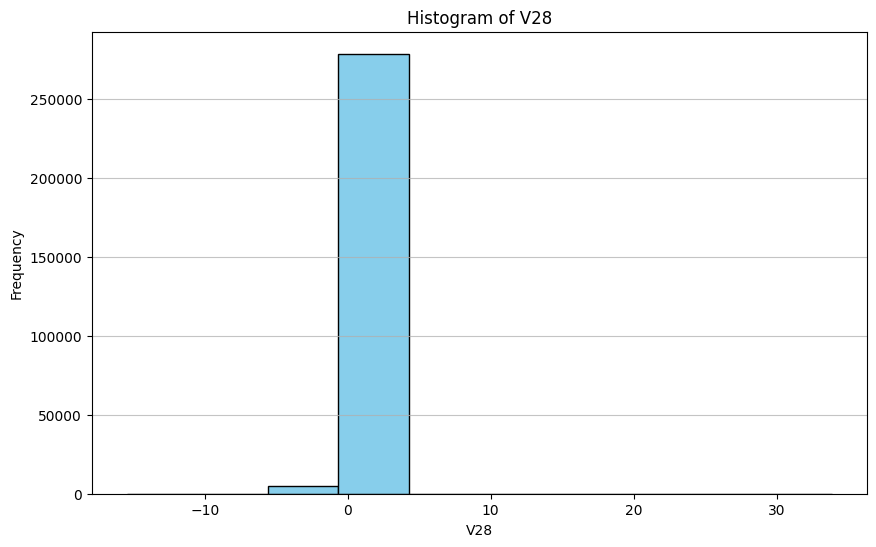

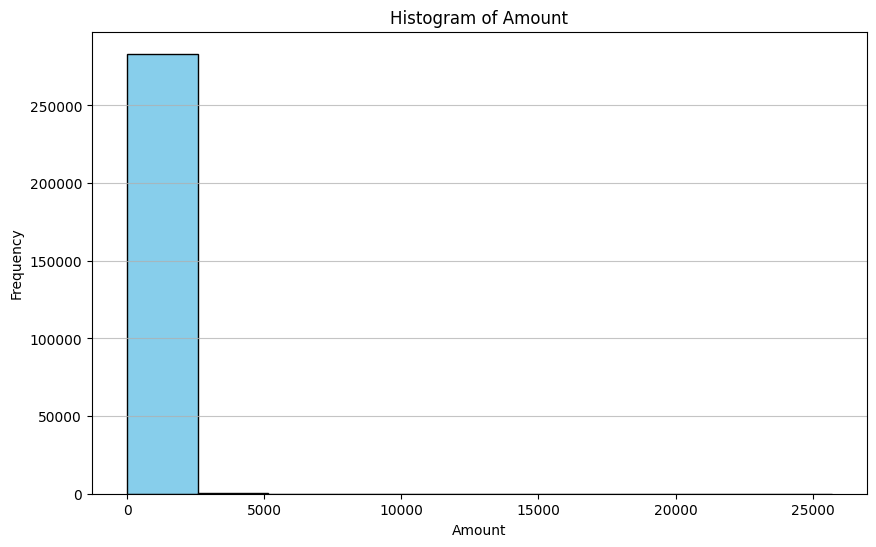

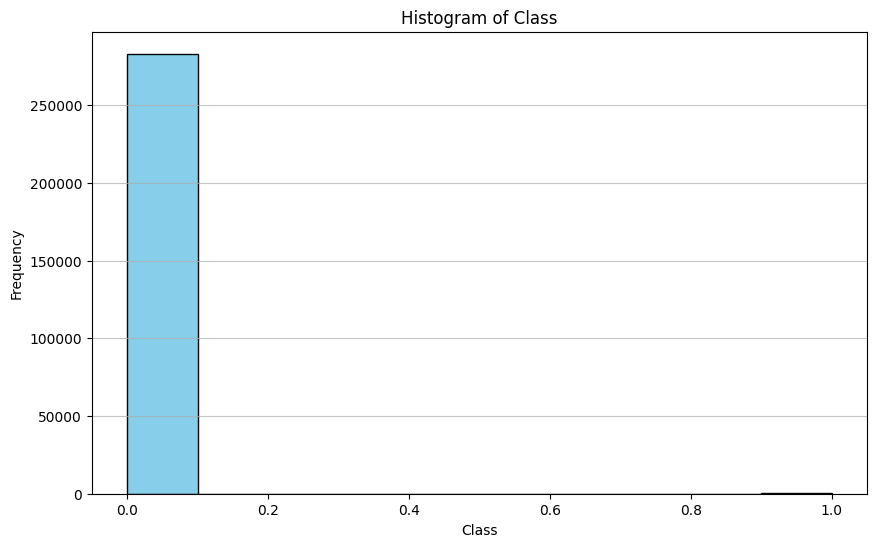

In [16]:
num_plot(credit)

### ip

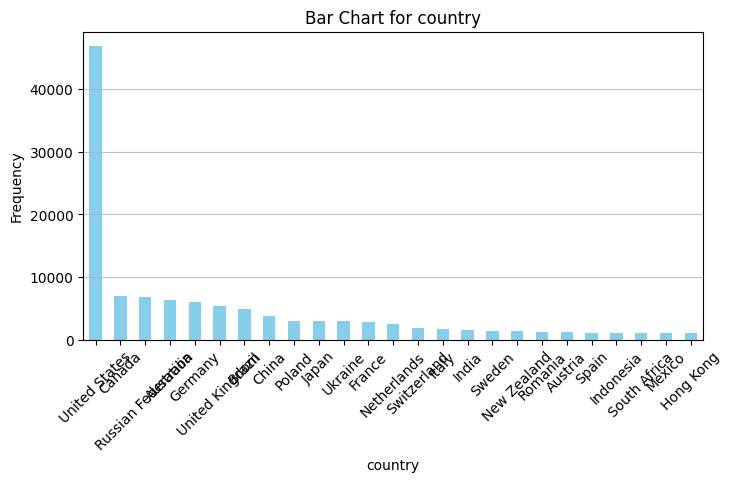

In [17]:
category_plot(ip)

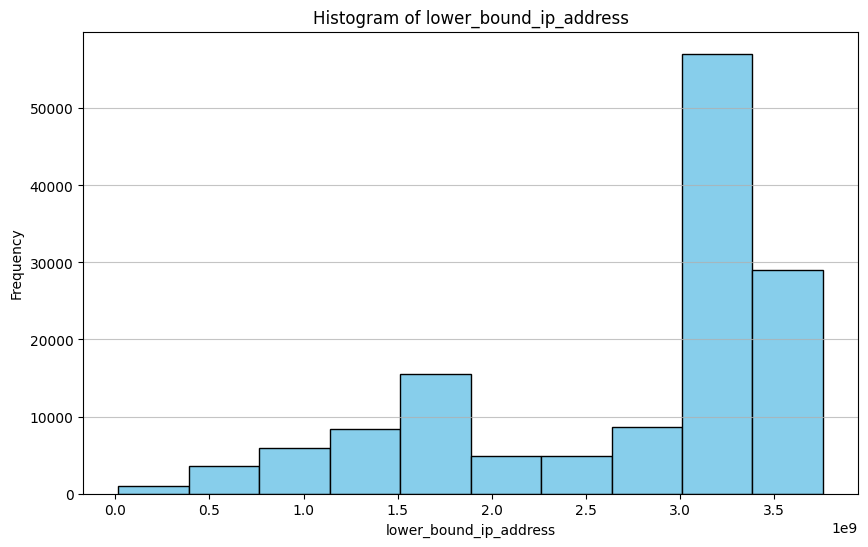

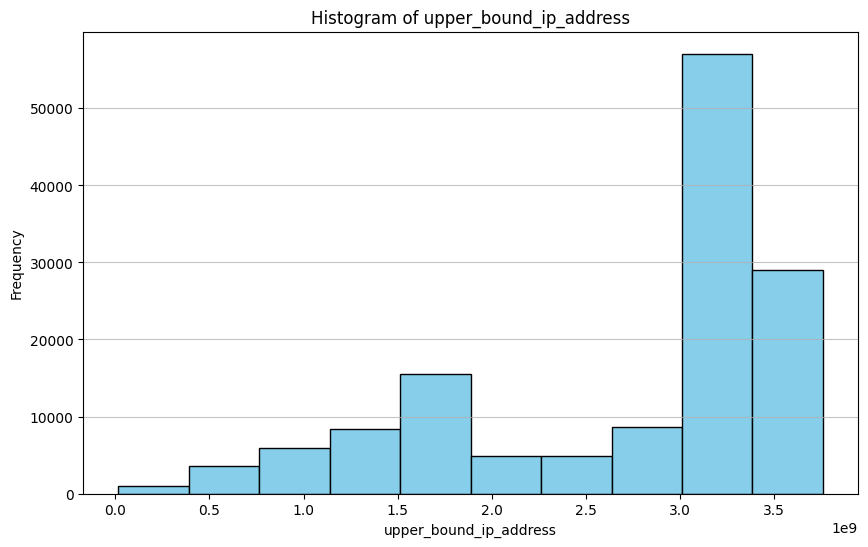

In [18]:
num_plot(ip)

### fraud 

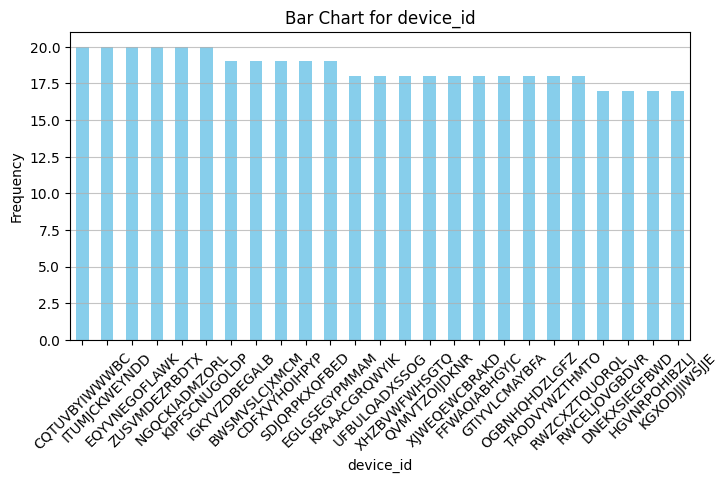

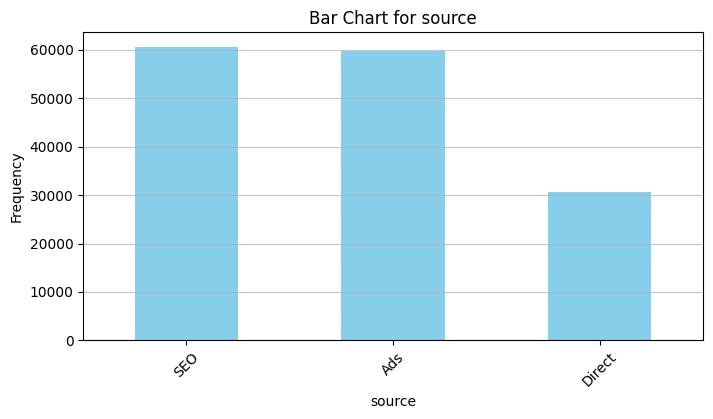

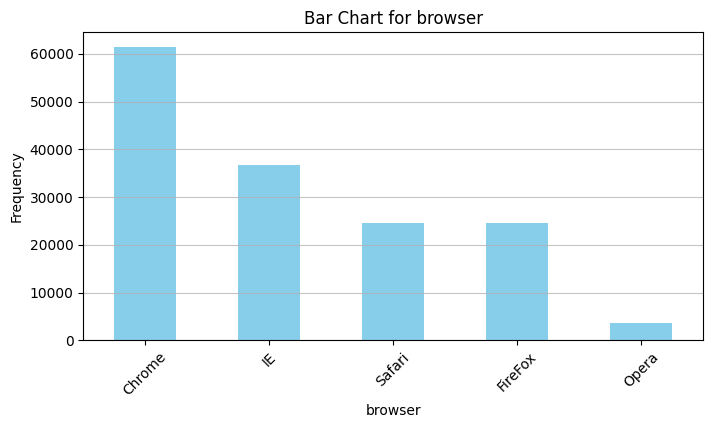

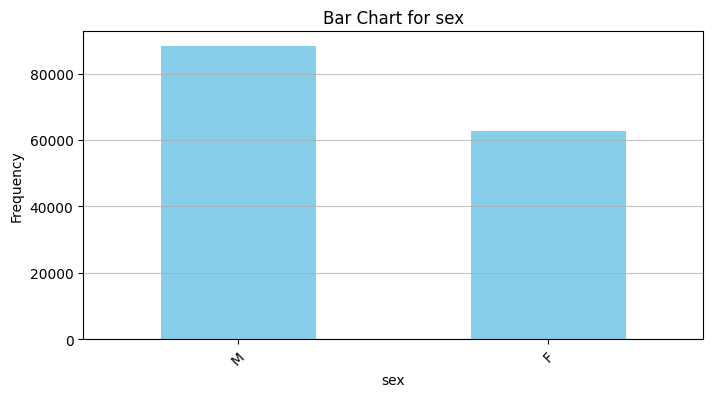

In [19]:
category_plot(fraud)

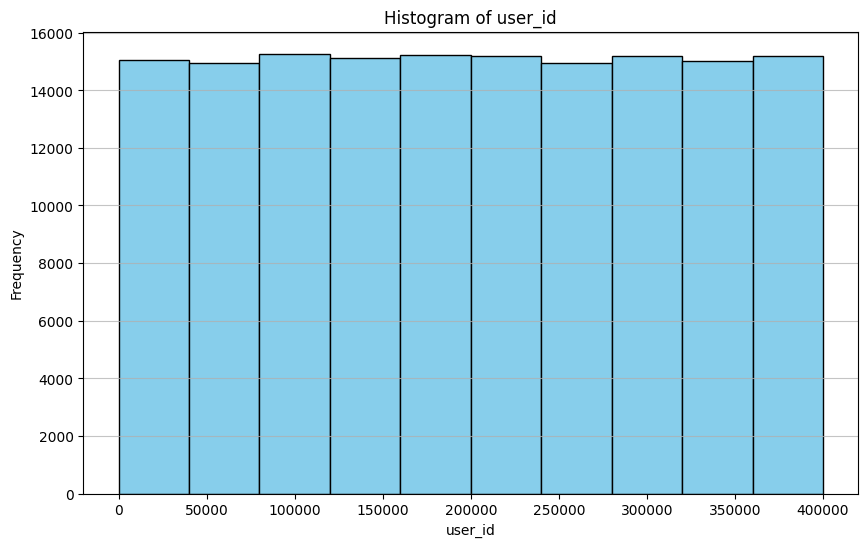

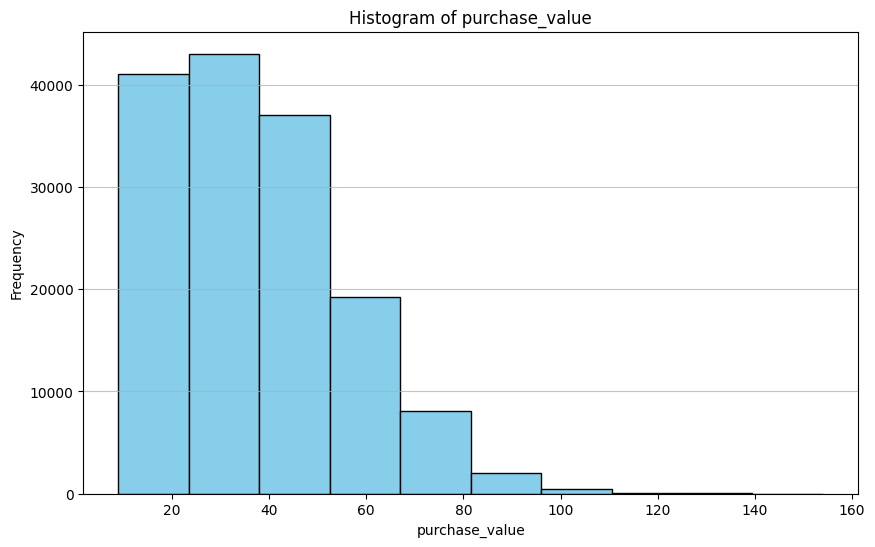

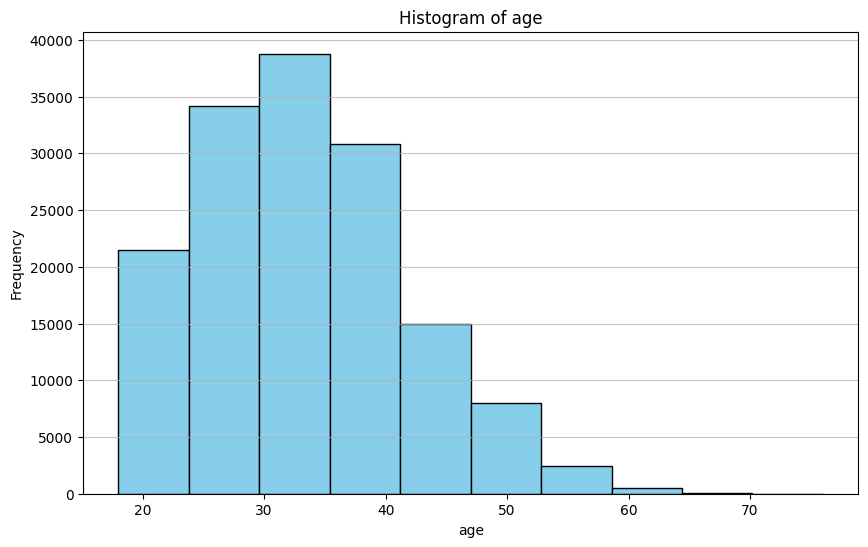

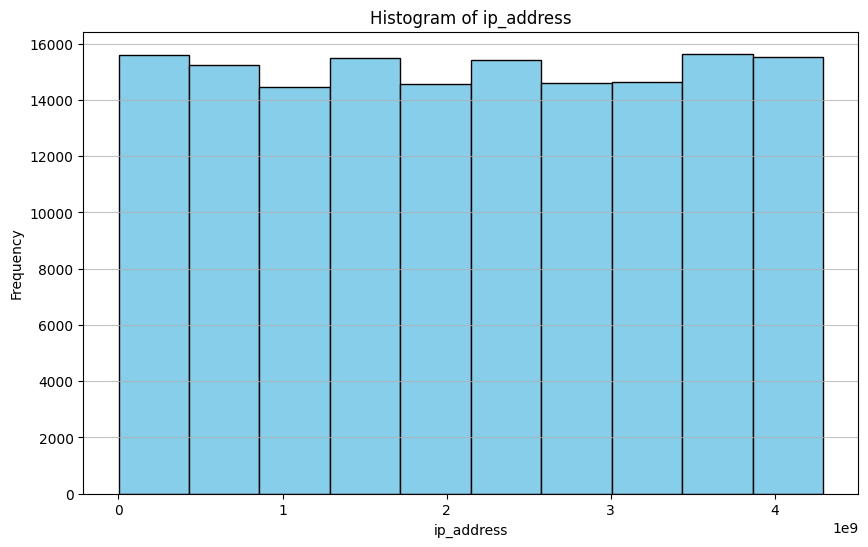

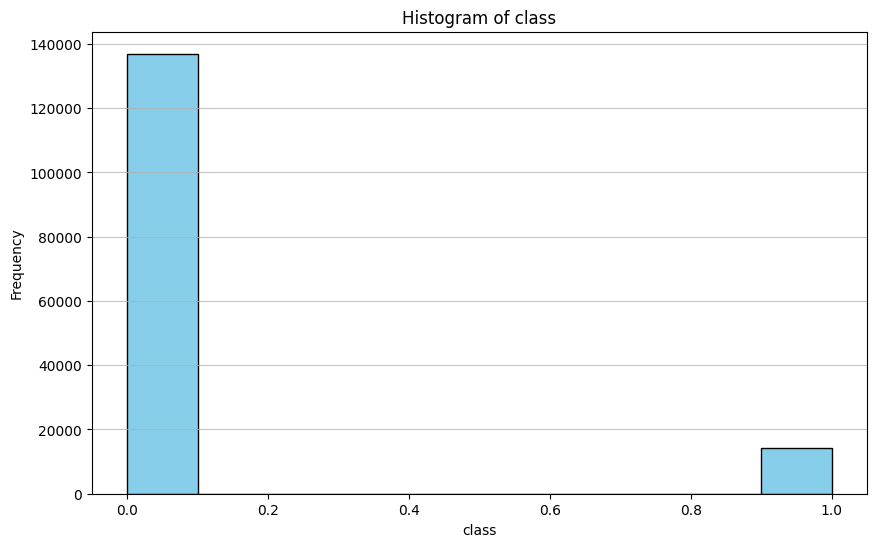

In [20]:
num_plot(fraud)

## Merge datasets

In [21]:
df_fraud = merge_data(fraud, ip)

In [22]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,NA
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


## Feature Engineering 

In [25]:
data_overview(df_fraud)

2024-10-20 22:29:38,364 - INFO - Loading Data Overivew


The shape of our Data is (151112, 12)

Data Overview:


,Data Types,Number of missing values,Unique values
sex,object,0,2
class,int64,0,2
source,object,0,3
browser,object,0,5
age,int64,0,58
purchase_value,int64,0,122
country,object,0,142
ip_address,int32,0,71501
device_id,object,0,137956
purchase_time,datetime64[ns],0,150679


In [26]:
feature_eng(df_fraud)


In [27]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour,day,transaction_count,transaction_velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,2,5,1,52 days 03:51:22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,0,1,0 days 04:59:04
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,NA,18,3,1,0 days 00:00:01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,NA,13,0,1,5 days 16:41:25
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,18,2,1,50 days 11:31:01


## Encoding and scaling 

### Credit data scaled

In [28]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [31]:
credit_feat = credit.drop('Class',axis=1)

In [34]:
credit_col = credit_feat.columns

In [35]:
credit_scaled = scaler('standardScaler', credit_feat, credit_col)

In [36]:
credit_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,-0.541662,-0.620391,-0.996550,-0.327050,1.603615,-0.539734,0.246646,0.028990,0.497011,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,1.582896,1.071659,0.490735,-0.151252,0.693541,0.529653,-0.136468,-0.220781,-0.178907,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,0.612829,0.067156,0.719981,-0.174539,2.562950,-3.309216,1.317260,-0.146738,-2.780497,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,-0.222524,0.179901,0.509483,-0.302638,-0.691296,-1.214165,-0.812176,2.345732,-1.515112,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,-0.807922,0.541797,1.351427,-1.176125,0.190272,-0.518043,-0.281545,-0.047422,0.988165,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-6.102103,6.118855,-6.519873,-1.459282,-3.897079,-1.956335,-4.007632,6.196662,1.749010,4.048299,-1.564031,2.727184,-0.693028,4.858879,-1.011596,1.266436,2.363807,0.607991,-0.839285,1.916461,0.295375,0.154412,1.626230,-0.841382,2.757072,0.518377,2.380049,2.509507,-0.350252
284803,1.642257,-0.379208,-0.030938,1.347812,-0.520175,0.629193,0.795504,0.018351,0.250814,0.535282,-0.905314,-0.147627,0.921425,1.219729,-0.709290,1.272159,-0.815982,-0.030698,-1.460149,-1.899847,0.077182,0.296413,1.275826,0.019665,-1.678330,-1.163409,-0.820253,0.168567,-0.164849,-0.254325
284804,1.642278,0.982354,-0.180433,-2.155033,-0.392355,1.908988,2.276699,-0.243249,0.601561,0.396215,-0.449033,0.403853,0.064176,-0.185149,-0.536491,1.451800,0.159729,0.371904,0.470681,-0.709373,0.001570,0.321057,0.798074,-0.060444,1.056626,0.510299,-0.181557,0.006802,-0.082640,-0.082239
284805,1.642278,-0.126465,0.324660,0.464577,0.489870,-0.275808,0.469130,-0.560399,0.576734,0.359367,-0.369456,-1.898514,-0.967325,-1.047474,0.471924,2.143991,-0.697886,0.605050,1.328514,3.563062,0.165259,0.366919,1.104223,-0.262138,0.203081,-1.091530,1.133734,0.270523,0.317004,-0.313391


### Fraud data scaled

In [43]:
categorical_feature = [ 'source', 'browser', 'sex', 'country', ]

num_cat = [ 'purchase_value', 'age',  'hour', 'day', 'transaction_count']

all_feature = categorical_feature + num_cat
df_feat = df_fraud[all_feature]

In [45]:
df_label  = encoder('labelEncoder', df_feat, categorical_feature)

In [46]:
df_fraud_scaled = scaler('standardScaler', df_label, num_cat)

In [47]:
df_fraud_scaled

,source,browser,sex,country,purchase_value,age,hour,day,transaction_count
0,2,0,1,61,-0.160204,0.679914,-1.377455,0.991020,0.0
1,0,0,0,137,-1.142592,2.304476,-1.522122,-1.501259,0.0
2,2,3,1,89,-1.197169,2.304476,0.937208,-0.005891,0.0
3,2,4,1,89,0.385567,0.911994,0.213876,-1.501259,0.0
4,0,4,1,137,0.112681,1.376155,0.937208,-0.504347,0.0
...,...,...,...,...,...,...,...,...,...
151107,2,0,1,89,0.330990,-0.596528,-1.666788,1.489476,0.0
151108,2,4,1,89,-0.105627,-0.132367,0.069209,-1.002803,0.0
151109,2,2,0,89,0.167258,-0.828608,-0.654123,-0.504347,0.0
151110,2,0,1,89,0.494721,0.447833,-0.364790,-1.501259,0.0
